In [1]:
#! pip  install geopandas
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv('C:/Users/91902/Downloads/country_wise_latest.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [5]:
print("No of rows and columns")

No of rows and columns


In [6]:
df.shape

(187, 15)

In [7]:
df.dropna(inplace=True,axis=1)
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
182    False
183    False
184    False
185    False
186    False
Length: 187, dtype: bool

In [9]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [10]:
covid=df.pivot_table(index='Country/Region',values=['Confirmed','Deaths','Recovered'])
covid.tail()

,Confirmed,Deaths,Recovered
Country/Region,,,
West Bank and Gaza,10621,78,3752
Western Sahara,10,1,8
Yemen,1691,483,833
Zambia,4552,140,2815
Zimbabwe,2704,36,542


In [11]:
covid=pd.DataFrame(df,columns=['Country/Region','Confirmed','Deaths','Recovered'])
print(covid.head(5))

  Country/Region  Confirmed  Deaths  Recovered
0    Afghanistan      36263    1269      25198
1        Albania       4880     144       2745
2        Algeria      27973    1163      18837
3        Andorra        907      52        803
4         Angola        950      41        242


In [12]:
covid.style.background_gradient(cmap='gist_gray_r')

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242
5,Antigua and Barbuda,86,3,65
6,Argentina,167416,3059,72575
7,Armenia,37390,711,26665
8,Australia,15303,167,9311
9,Austria,20558,713,18246


In [16]:
covid=covid.sort_values(by='Confirmed',ascending=False)
covid.head()

,Country/Region,Confirmed,Deaths,Recovered
173,US,4290259,148011,1325804
23,Brazil,2442375,87618,1846641
79,India,1480073,33408,951166
138,Russia,816680,13334,602249
154,South Africa,452529,7067,274925


In [17]:
covid.nlargest(10, 'Confirmed')

,Country/Region,Confirmed,Deaths,Recovered
173,US,4290259,148011,1325804
23,Brazil,2442375,87618,1846641
79,India,1480073,33408,951166
138,Russia,816680,13334,602249
154,South Africa,452529,7067,274925
111,Mexico,395489,44022,303810
132,Peru,389717,18418,272547
35,Chile,347923,9187,319954
177,United Kingdom,301708,45844,1437
81,Iran,293606,15912,255144


<AxesSubplot:title={'center':'Top 10 countries with most number of confirmed cases'}, xlabel='Country/Region'>

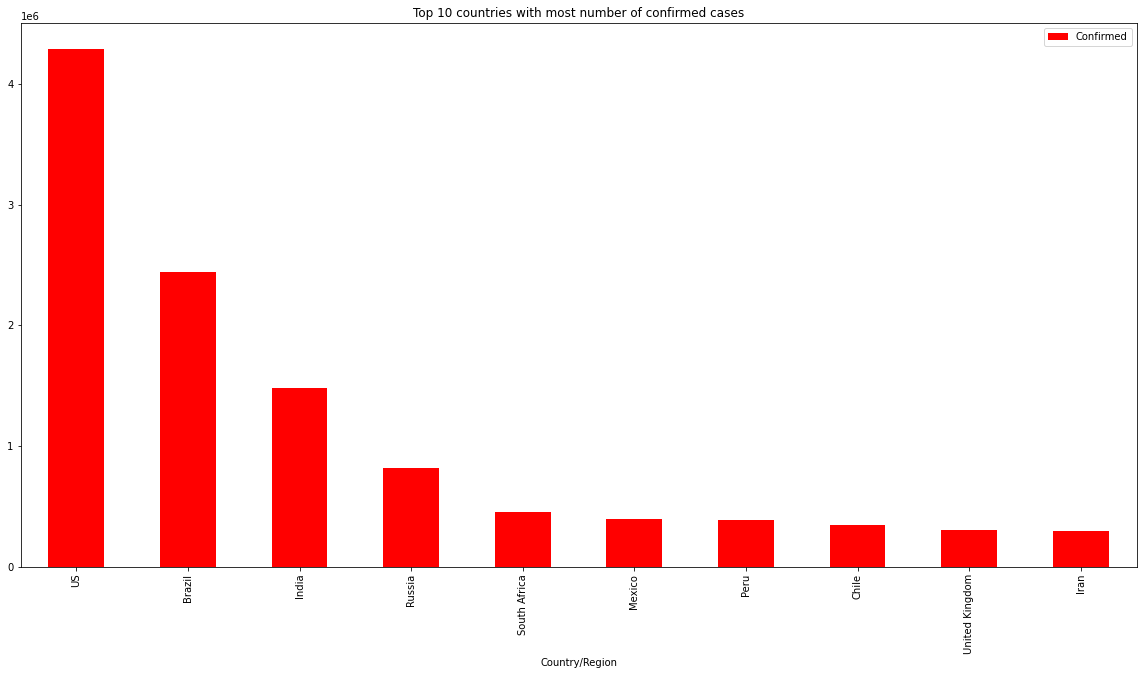

In [18]:
top=covid.head(10)
top.reset_index().plot(kind='bar',x='Country/Region',y='Confirmed',title='Top 10 countries with most number of confirmed cases',color=['Red'],figsize=(20,10))
#sns.set(font_scale=1.5)

In [19]:
covid=covid.sort_values(by='Deaths',ascending=False)
covid.head()

,Country/Region,Confirmed,Deaths,Recovered
173,US,4290259,148011,1325804
23,Brazil,2442375,87618,1846641
177,United Kingdom,301708,45844,1437
111,Mexico,395489,44022,303810
85,Italy,246286,35112,198593


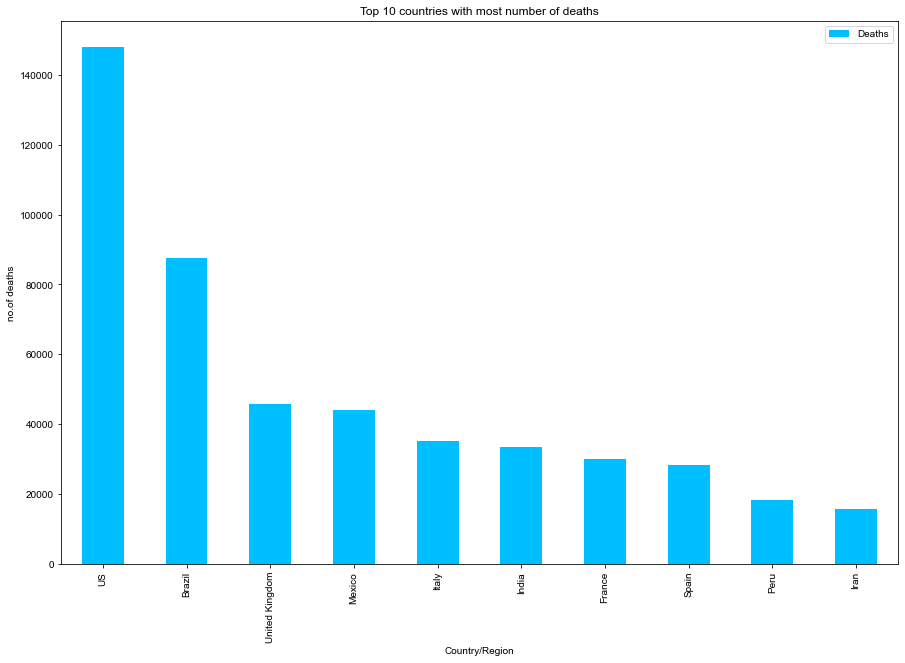

In [20]:
top=covid.head(10)
top.reset_index().plot(kind='bar',x='Country/Region',y='Deaths',title='Top 10 countries with most number of deaths',color=['deepskyblue'],figsize=(15,10))
plt.ylabel("no.of deaths")
sns.set(font_scale=3)


In [21]:
covid=covid.sort_values(by='Recovered',ascending=False)
covid.head()

,Country/Region,Confirmed,Deaths,Recovered
23,Brazil,2442375,87618,1846641
173,US,4290259,148011,1325804
79,India,1480073,33408,951166
138,Russia,816680,13334,602249
35,Chile,347923,9187,319954


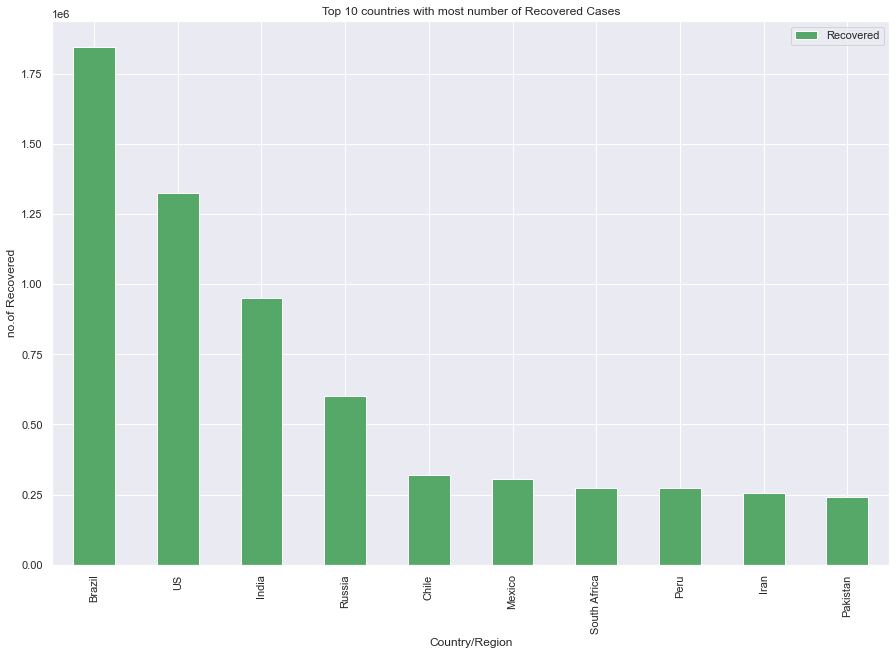

In [33]:
top=covid.head(10)
top.reset_index().plot(kind='bar',x='Country/Region',y='Recovered',title='Top 10 countries with most number of Recovered Cases',color=['g'],figsize=(15,10))
plt.ylabel("no.of Recovered")
sns.set(font_scale=1)

               COUNTRY                                           geometry
0  Aruba (Netherlands)  POLYGON ((-69.88223 12.41111, -69.94695 12.436...
1  Antigua and Barbuda  MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...
2          Afghanistan  POLYGON ((61.27656 35.60725, 61.29638 35.62853...
3              Algeria  POLYGON ((-5.15213 30.18047, -5.13917 30.19236...
4           Azerbaijan  MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...
5              Albania  POLYGON ((20.79192 40.43154, 20.78722 40.39472...
6              Armenia  MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...
7              Andorra  POLYGON ((1.44583 42.60194, 1.48653 42.65041, ...
8               Angola  MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4...
9  American Samoa (US)  POLYGON ((-170.74390 -14.37556, -170.74942 -14...


<AxesSubplot:>

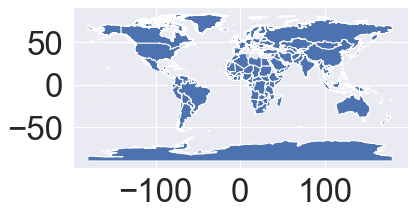

In [23]:
fp_2 = "C:/Users/91902/Documents/Downloads/World_Countries/World_Countries.dbf"
map_covid = gpd.read_file(fp_2)
#map=gpd.
#map_covid.head()
print(map_covid.head(10))
map_covid.plot()

In [26]:
merged = map_covid.set_index('COUNTRY').join(covid.set_index('Country/Region'))
merged.head(10)

,geometry,Confirmed,Deaths,Recovered
COUNTRY,,,,
Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",NaN,NaN,NaN
Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",86.0,3.0,65.0
Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",36263.0,1269.0,25198.0
Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",27973.0,1163.0,18837.0
Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",30446.0,423.0,23242.0
Albania,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",4880.0,144.0,2745.0
Armenia,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38...",37390.0,711.0,26665.0
Andorra,"POLYGON ((1.44583 42.60194, 1.48653 42.65041, ...",907.0,52.0,803.0
Angola,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4...",950.0,41.0,242.0


<AxesSubplot:title={'center':' Confirmed Cases'}>

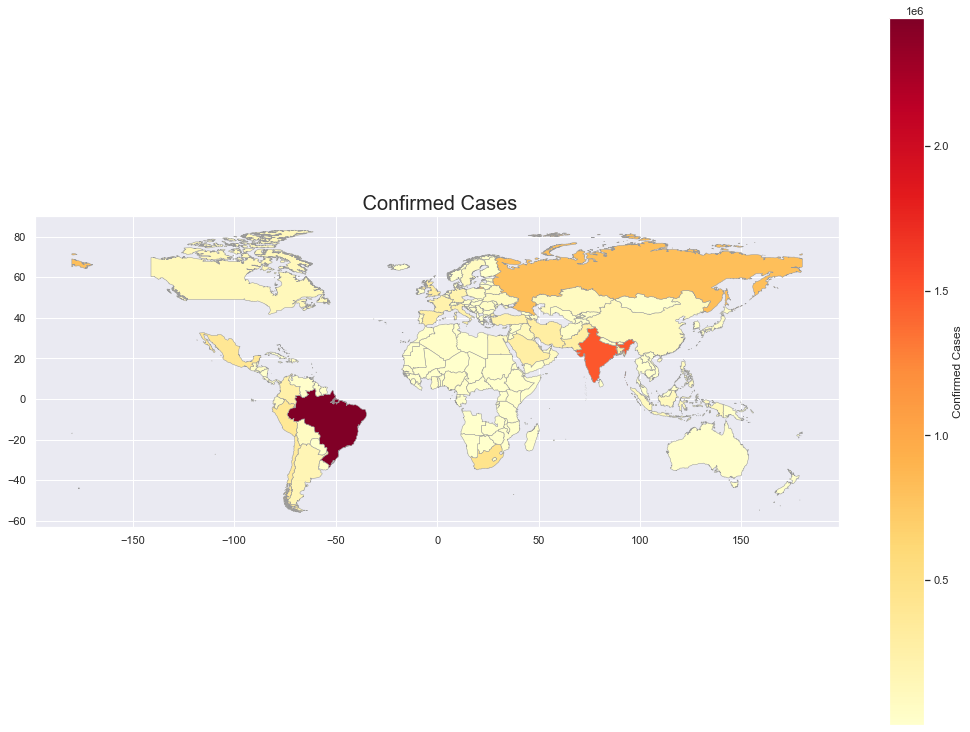

In [32]:
from matplotlib.backend_bases import MouseEvent
variable = 'Confirmed'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(18, 13))
ax.axis('on')
plt.title(" Confirmed Cases", fontsize = 20)
merged.plot(column=variable, cmap='YlOrRd', linewidth=0.5, ax=ax, edgecolor='0.6', legend='False' , legend_kwds={'label': "Confirmed Cases",
'orientation': "vertical" })


<AxesSubplot:title={'center':' Deaths '}>

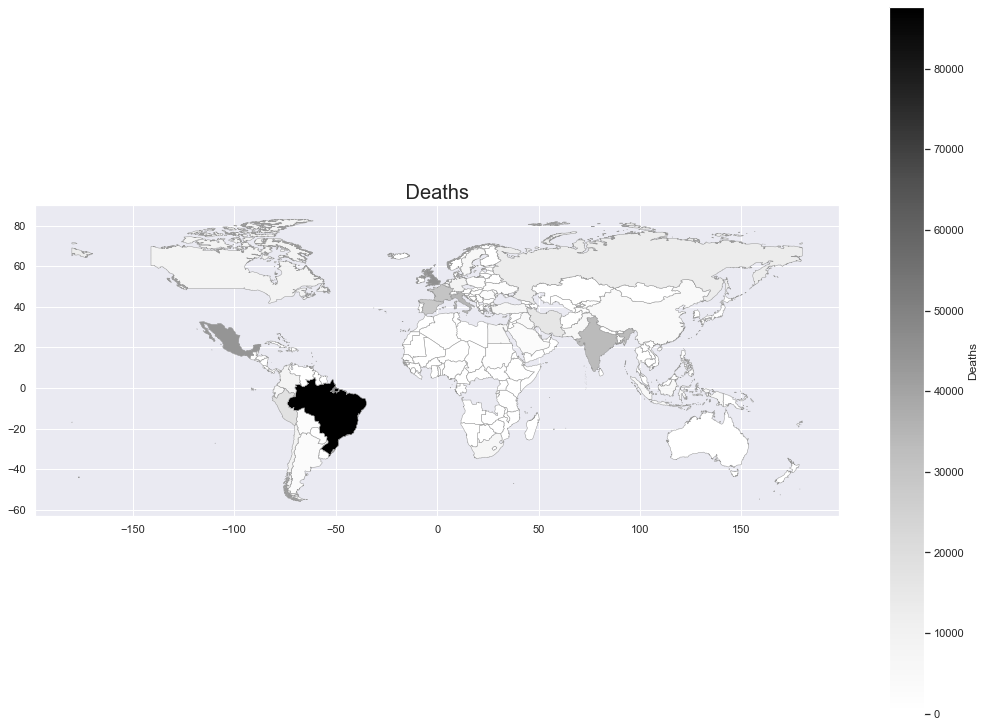

In [31]:
from matplotlib.backend_bases import MouseEvent
variable = 'Deaths'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(18, 13))
ax.axis('on')
plt.title(" Deaths ", fontsize = 20)
merged.plot(column=variable, cmap='Greys', linewidth=0.5, ax=ax, edgecolor='0.6', legend='True', legend_kwds={'label': "Deaths",
                        'orientation': "vertical"})


<AxesSubplot:title={'center':'Recovered Cases'}>

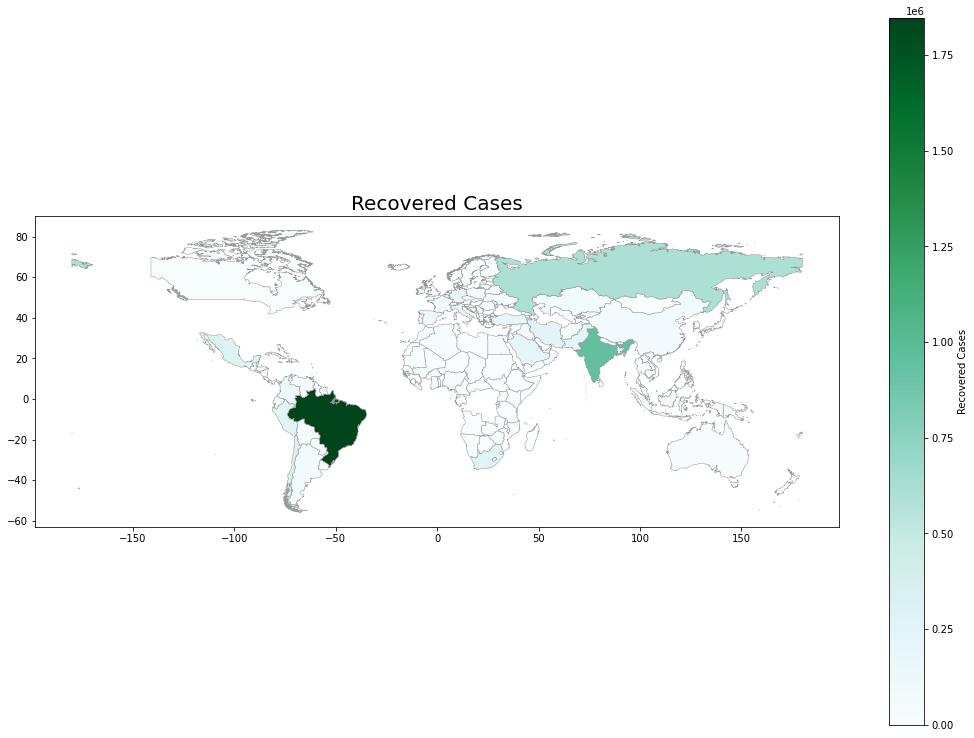

In [102]:
from matplotlib.backend_bases import MouseEvent
variable = 'Recovered'
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1,figsize=(18, 13))
ax.axis('on')
plt.title("Recovered Cases", fontsize = 20)
merged.plot(column=variable, cmap='BuGn', linewidth=0.5, ax=ax, edgecolor='0.6',legend='False', legend_kwds={'label': "Recovered Cases",
             'orientation': "vertical"})

